# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rizkika Deviyanti
- **Email:** kikadvynt@gmail.com
- **ID Dicoding:** rizkika_deviyanti

## Menentukan Pertanyaan Bisnis

- Apakah workingday sepeda lebih banyak disewa dibandingkan weekend?
- Hari apakah yang paling banyak sepeda disewa dalam seminggu?
- Bagaimana kondisi angin dapat mempengaruhi penyewaan sepeda?
- Kapan dan berapa jumlah terbanyak sepeda disewa dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Sesuai dengan pertanyaan, analisis data yang digunakan akan menggunakan data dari file day.csv

In [45]:
day_df = pd.read_csv("day.csv", delimiter=",")

print(day_df)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

**Insight:**
- Ada sebanyak 731 baris dan 16 kolom pada data day.csv

### Assessing Data

Mengecek apakah ada data yang missing value/null

In [46]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Mengecek apakah ada data yang duplikat

In [47]:
day_df.duplicated().sum()

0

Mengecek tipe data dari day_df untuk analisis outlier

In [48]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek apakah ada outlier dengan visualisasi menggunakan boxplot

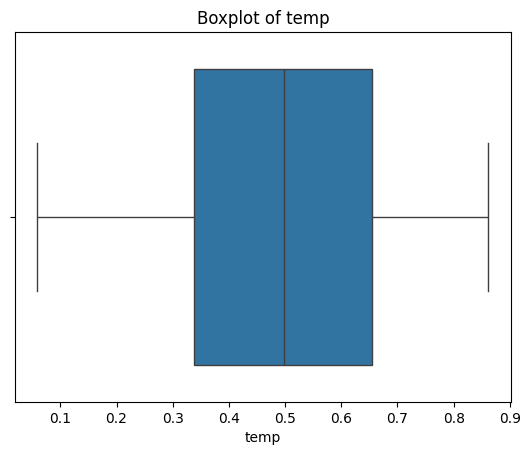

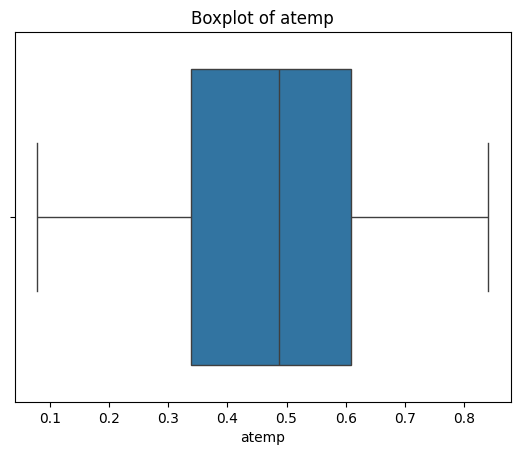

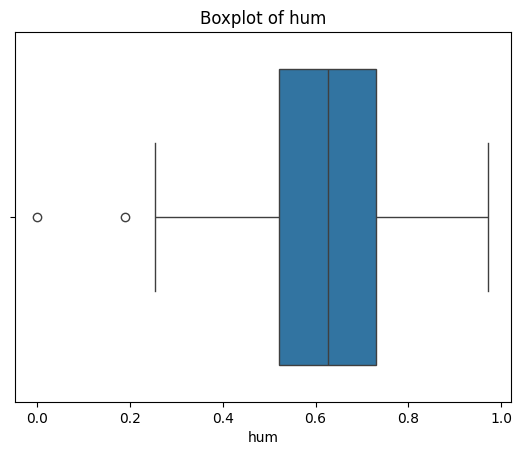

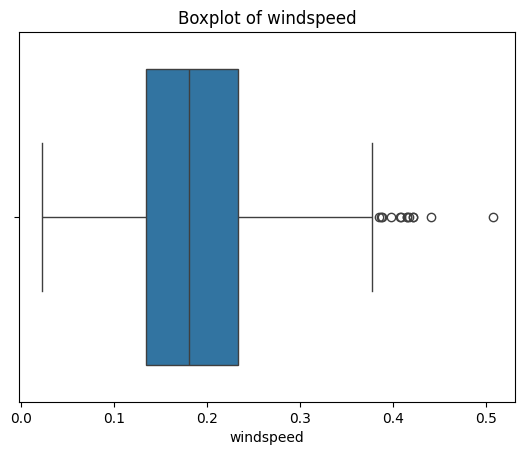

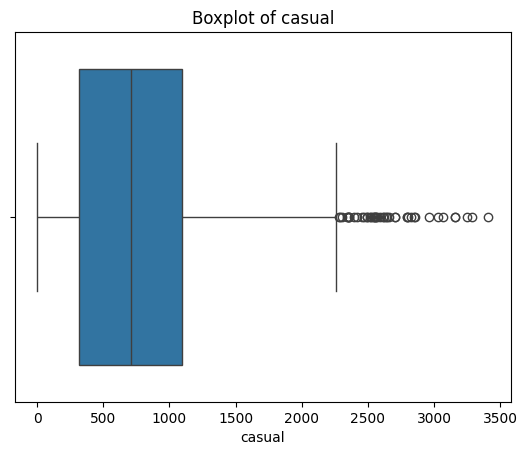

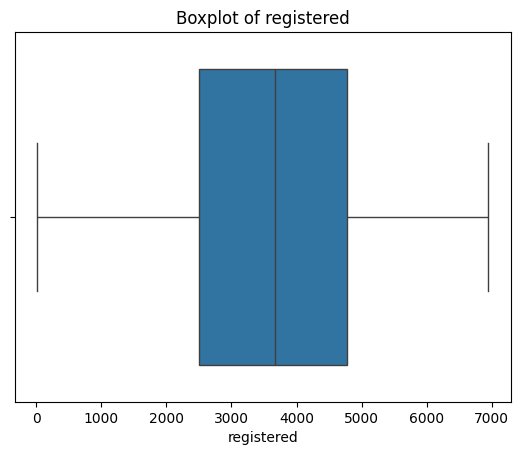

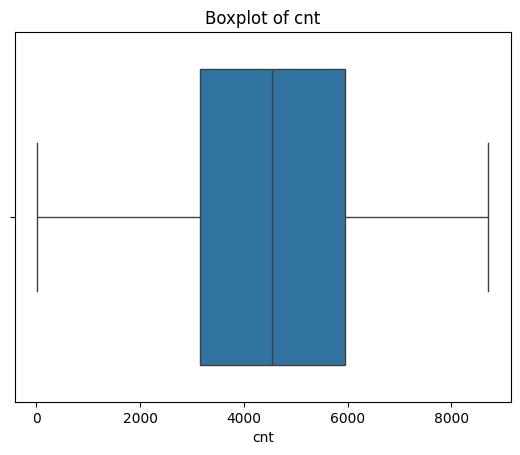

In [49]:
# Daftar kolom yang akan dianalisis dengan boxplot
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Membuat boxplot untuk setiap kolom numerik
for column in numeric_columns:
    sns.boxplot(x=day_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


**Insight:**
- Tidak ada data yang missing value/null pada day_df
- Tidak ada data duplikat pada day_df
- Terdapat outlier pada data numerik humidity (hum), windspeed, casual

### Cleaning Data

Menghapus outlier dengan menggunakan metode drop pada kolom humadity, windspeed, casual dan membuat variabel baru bernama day_df_clean untuk data yang sudah dicleaning dari outlier

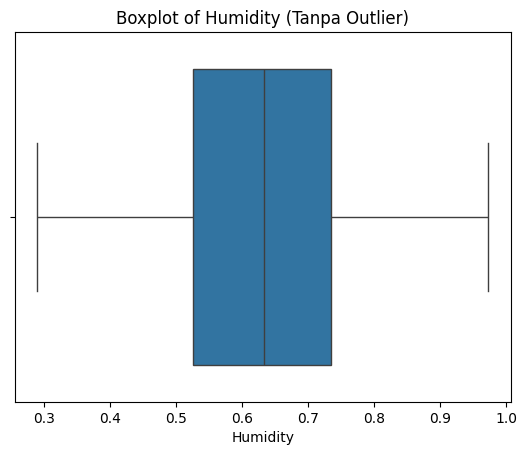

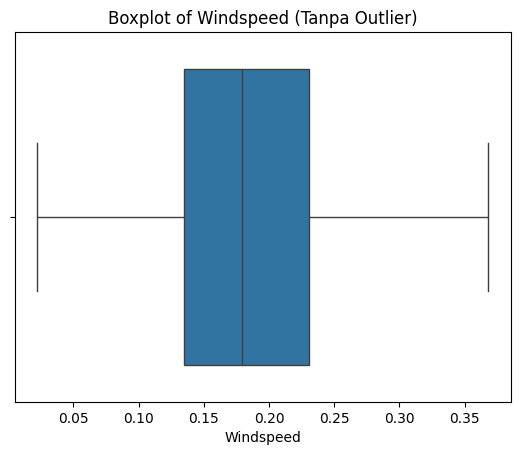

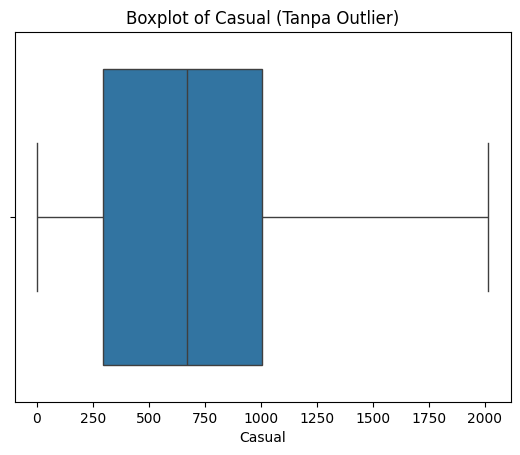

In [50]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers_iqr(df, column):
    while True:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Deteksi outlier
        initial_size = df.shape[0]
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        final_size = df.shape[0]

        # Jika tidak ada lagi data yang dihapus, hentikan loop
        if initial_size == final_size:
            break
    return df

# Menghapus outlier untuk kolom 'hum', 'windspeed', dan 'casual'
day_df_clean = remove_outliers_iqr(day_df, 'hum')
day_df_clean = remove_outliers_iqr(day_df_clean, 'windspeed')
day_df_clean = remove_outliers_iqr(day_df_clean, 'casual')

# Visualisasi Boxplot untuk memastikan outlier telah dihapus
sns.boxplot(x=day_df_clean['hum'])
plt.title('Boxplot of Humidity (Tanpa Outlier)')
plt.xlabel('Humidity')
plt.show()

sns.boxplot(x=day_df_clean['windspeed'])
plt.title('Boxplot of Windspeed (Tanpa Outlier)')
plt.xlabel('Windspeed')
plt.show()

sns.boxplot(x=day_df_clean['casual'])
plt.title('Boxplot of Casual (Tanpa Outlier)')
plt.xlabel('Casual')
plt.show()


**Insight:**
- Pada kolom humadity, windspeed, casual outlier dihapus dengan metode drop
- Terlihat pada visualisasi boxplot outlier sudah tidak ada

## Exploratory Data Analysis (EDA)

### Explore ...

Mengelompokkan total sewa sepeda berdasarkan workingday
- 0 = Weekend
- 1 = Working Day

In [51]:
total_sewa_workingday = day_df_clean.groupby(by='workingday')['cnt'].sum()

print(total_sewa_workingday)

workingday
0     569224
1    2246685
Name: cnt, dtype: int64


Mengelompokkan total sewa sepeda berdasarkan weekday
- 0 = Minggu
- 1 = Senin
- 2 = Selasa
- 3 = Rabu
- 4 = Kamis
- 5 = Jumat
- 6 = Sabtu

In [52]:
total_sewa_weekday = day_df_clean.groupby(by='weekday')['cnt'].sum()

print(total_sewa_weekday)

weekday
0    263165
1    432831
2    467314
3    462269
4    475195
5    468022
6    247113
Name: cnt, dtype: int64


Melihat keseluruhan ringkasan statistik data

In [53]:
day_df_clean.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,651.000000,651,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
unique,NaN,651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,352.964670,NaN,2.496160,0.463902,6.531490,0.027650,2.964670,0.749616,1.410138,0.487567,0.467521,0.634295,0.186569,701.566820,3623.946237,4325.513057
std,211.702143,NaN,1.126424,0.499079,3.521823,0.164093,1.884425,0.433567,0.551213,0.185951,0.165349,0.140619,0.071193,470.746902,1594.367857,1857.022038
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.290000,0.022392,2.000000,20.000000,22.000000
25%,170.500000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.500000,1.000000,0.325833,0.325121,0.524900,0.134952,295.000000,2459.000000,3002.000000
50%,342.000000,NaN,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.475833,0.466538,0.632917,0.179108,670.000000,3603.000000,4363.000000
75%,537.500000,NaN,3.500000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.653333,0.606383,0.735100,0.230725,1004.500000,4748.000000,5531.500000


Melihat korelasi antara kondisi angin dan penyewaan sepeda

In [54]:
# Menghitung korelasi antara weathersit dan jumlah sewa sepeda
korelasi = day_df_clean[['windspeed', 'cnt']].corr()

# Menampilkan hasil
print("Korelasi antara kondisi angin dan jumlah sewa sepeda:")
print(korelasi)


Korelasi antara kondisi angin dan jumlah sewa sepeda:
           windspeed       cnt
windspeed   1.000000 -0.212973
cnt        -0.212973  1.000000


**Insight:**
- Total sewa sepeda setiap hari dalam seminggu tidak jauh berbeda
- Total sewa sepeda pada workingday dengan weekend berbeda jauh
- Nilai max "cnt" adalah 8173
- Ada hubungan kondisi angin dengan jumlah sewa sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah workingday sepeda lebih banyak disewa dibandingkan weekend?

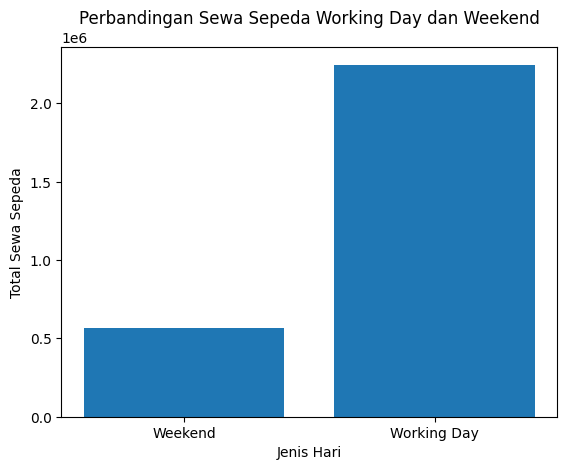

In [55]:
hari = ['Weekend', 'Working Day']

plt.bar(x=hari, height=total_sewa_workingday)
plt.title('Perbandingan Sewa Sepeda Working Day dan Weekend')
plt.ylabel('Total Sewa Sepeda')
plt.xlabel('Jenis Hari')

plt.show()

### Pertanyaan 2: Hari apakah yang paling banyak sepeda disewa dalam seminggu?

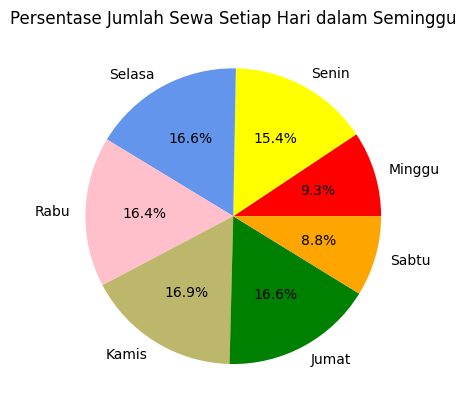

In [56]:
hari = ('Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu')
nilai = (total_sewa_weekday.values)
colors = ('red','yellow', '#6495ED', 'pink', '#BDB76B', 'green',  'orange')

plt.pie(
    x=nilai,
    labels=hari,
    autopct='%1.1f%%',
    colors=colors,
)
plt.title('Persentase Jumlah Sewa Setiap Hari dalam Seminggu')
plt.show()


# Pertanyaa 3: Bagaimana kondisi angin dapat mempengaruhi penyewaan sepeda?

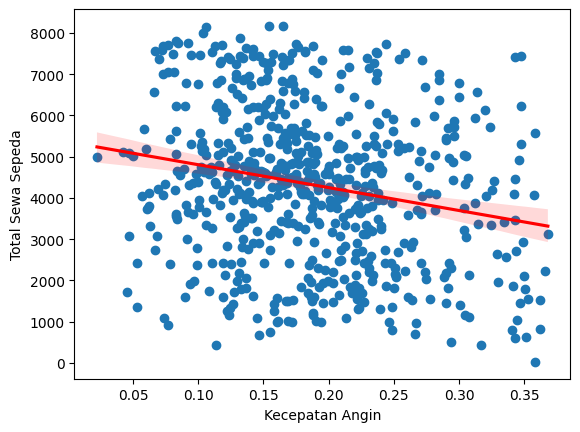

In [57]:
total_sewa = day_df_clean["cnt"]
angin = day_df_clean["windspeed"]

plt.scatter(x=angin, y=total_sewa)
sns.regplot(x=angin, y=total_sewa, scatter=False, color="red")
plt.xlabel('Kecepatan Angin')
plt.ylabel('Total Sewa Sepeda')
plt.show()

# Pertanyaan 4: Kapan dan berapa jumlah terbanyak sepeda disewa dalam sehari?

In [58]:
# Mendapatkan baris dengan nilai 'cnt' maksimum
max_cnt_row = day_df_clean.loc[day_df_clean['cnt'].idxmax()]

# Membuat tabel dengan format yang diinginkan
tabel_max = pd.DataFrame({
    'Tanggal': [max_cnt_row['dteday']],
    'Registered User': [max_cnt_row['registered']],
    'Casual User': [max_cnt_row['casual']],
    'Total sepeda disewa': [max_cnt_row['cnt']],
})

print(tabel_max)

      Tanggal  Registered User  Casual User  Total sepeda disewa
0  2012-07-25             6790         1383                 8173


**Insight:**
- Dari barplot sangat terlihat perbedaan jumlah sewa sepeda pada Working Day dan Weekend
- Persentase jumlah sewa sepeda pada hari selasa-jumat hanya berbeda sekitar 0.1-0.5%
- Korelasi antara kondisi angin dengan jumlah sewa sepeda adalah negatif
- Sepeda disewa terbanyak oleh Registered User

## Analisis Lanjutan (Opsional)

Analisis frekuensi jumlah sewa sepeda perbulan selama 2 tahun (2011-2012)

      Bulan  Total Sewa
0   2011-01       38189
1   2011-02       44667
2   2011-03       63422
3   2011-04       89960
4   2011-05      125228
5   2011-06      143512
6   2011-07      119607
7   2011-08      135576
8   2011-09      122478
9   2011-10      108396
10  2011-11      102167
11  2011-12       87323
12  2012-01       90154
13  2012-02       98876
14  2012-03      121041
15  2012-04      128637
16  2012-05      134483
17  2012-06      143944
18  2012-07      168543
19  2012-08      186971
20  2012-09      157492
21  2012-10      149903
22  2012-11      136999
23  2012-12      118341


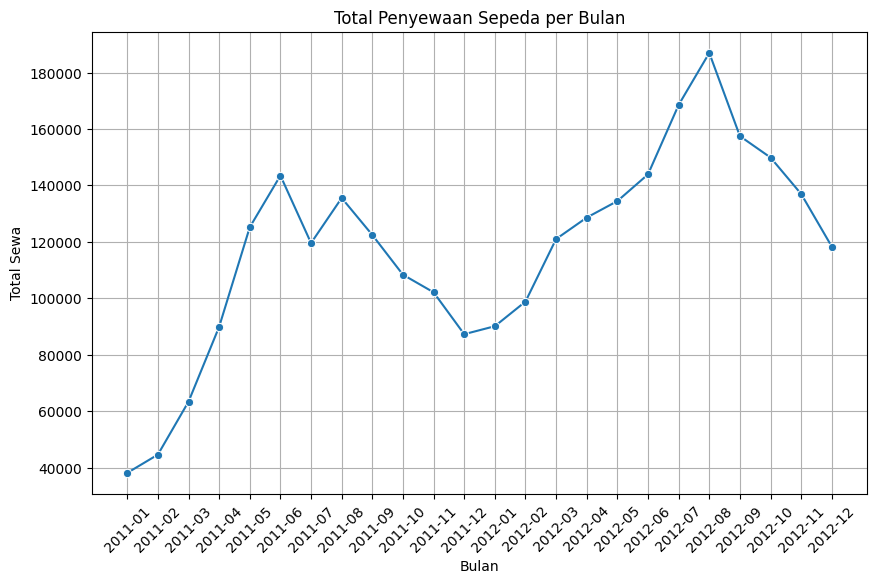

In [59]:
day_df_clean['dteday'] = pd.to_datetime(day_df_clean['dteday'])

monthly_df = day_df_clean.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

monthly_df.index = monthly_df.index.strftime('%Y-%m')
monthly_df = monthly_df.reset_index()

monthly_df.rename(columns={
    "cnt": "Total Sewa",
    "dteday": "Bulan"
}, inplace=True)

print(monthly_df.head(24))

# Visualisasi dengan Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_df, x='Bulan', y='Total Sewa', marker='o')
plt.title('Total Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Sewa')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Terlihat bahwa pada bulan Agustus 2012, jumlah penyewaan sepeda mencapai titik tertinggi. Hal ini mungkin disebabkan oleh beberapa faktor, seperti cuaca yang mendukung untuk beraktivitas di luar ruangan, serta potensi adanya acara atau kegiatan yang mendorong lebih banyak orang untuk menggunakan sepeda.

## Conclusion

- Pertanyaan 1: Jumlah sepeda yang disewa lebih banyak pada hari kerja (Working Day) dibandingkan akhir pekan (Weekend). Hal ini menunjukkan bahwa orang-orang cenderung lebih banyak menggunakan sepeda untuk keperluan sehari-hari, seperti pergi ke kantor atau beraktivitas di luar rumah selama hari kerja.
- Pertanyaan 2: Hari yang paling banyak pengguna menyewa sepeda adalah hari Kamis dengan persentase 16.9%. Meskipun dibandingkan dengan hari Selasa dan Jumat yang keduanya berjumlah sama, hanya berbeda 0.3% dibandingkan hari Kamis. perbedaan ini juga tidak terlalu signifikan pada hari kerja lainnya.
- Pertanyaan 3: Pengaruh kondisi angin terhadap penyewaan sepeda berbanding terbalik. Semakin tinggi kecepatan angin, semakin sedikit pengguna yang menyewa sepeda. Hal ini dikarenakan kecepatan angin yang tinggi dapat menyebabkan ketidaknyamanan bagi para pengguna, serta meningkatkan risiko keselamatan saat berkendara menggunakan sepeda.
- Pertanyaan 4: Pada tanggal 25 Juli 2012, penyewaan sepeda mencapai angka tertinggi dengan total 8.173 sepeda disewa, terdiri dari 6.790 Registerd User (pelanggan) dan 1.383 Casual User.